<a href="https://colab.research.google.com/github/YoshifumiMiyagi/CDI_KD_ML/blob/main/%E2%98%85IP_paper(CDI)_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import numpy as np
import pandas as pd
import codecs
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

SEED=42

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE

In [155]:
!pip install japanize-matplotlib

In [156]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [157]:
with codecs.open("/content/drive/MyDrive/R5_9_23_DB3.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")
df

,施設,ID,Age (y),Age (m),Age,Age_0:4_1:7_2:8,Length,Weight,sex,5th Criteria count,...,NTT_HL,NTT_NL_HL,Kobayshi_Age,Kobayashi_Treat_day,Kobayashi_AST,Kobayashi_Na,Kobayashi_Neutro,Kobayashi_CRP,Kobayashi_Plt,Kobayashi_score
0,沼津,31204453,0,6.0,0.500000,0,NaN,NaN,male,NaN,...,NaN,NaN,1,2.0,NaN,NaN,0.0,NaN,NaN,3
1,静岡市立静岡病院,31,0,4.0,0.333333,0,62.0,6.2,female,3(BCG接種前）,...,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,2
2,藤枝市立,3684628,0,4.0,0.333333,0,68.0,8.7,male,5,...,NaN,NaN,1,2.0,2.0,2.0,0.0,0.0,1.0,8
3,磐田,3122674,0,2.0,0.166667,0,47.0,5.5,female,NaN,...,NaN,NaN,1,2.0,0.0,2.0,0.0,0.0,0.0,5
4,中東遠,13224236,0,4.0,0.333333,0,61.0,6.3,female,5,...,NaN,NaN,1,2.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,富士市立中央病院,83,1,NaN,1.000000,0,81.8,11.3,male,5,...,NaN,NaN,1,2.0,0.0,0.0,0.0,0.0,1.0,4
1114,富士市立中央病院,84,2,NaN,2.000000,0,86.5,13.5,female,5,...,NaN,NaN,0,2.0,0.0,0.0,0.0,0.0,0.0,2
1115,NaN,4454545,8,3.0,8.250000,2,130.5,25.0,female,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,0
1116,NaN,4456173,2,0.0,2.000000,0,81.4,11.2,female,5+,...,NaN,NaN,0,2.0,2.0,2.0,2.0,0.0,NaN,8


In [158]:
df.columns

Index(['施設', 'ID', 'Age (y)', 'Age (m)', 'Age', 'Age_0:4_1:7_2:8', 'Length',
       'Weight', 'sex', '5th Criteria count', '5th Criteria count_1',
       'BCG_non0_posi1', 'Onset date', 'Treat date',
       'TreatAre_0:before_1:2011_2:2016', 'Season', 'Treat day',
       'IVIG-non-responder_1', 'Second_line_nonresponders',
       'Non_responder_0_1_first_2_second', 'IVIG_first', '2nd_line', '3nd Tx',
       '4nd Tx', 'First_PSL', 'PSLnon0_use1', 'IFX_non0_use1', 'preWBC_1',
       'postWBC_1', 'FC_WBC', 'preNetro', 'post Netro', 'FC_Ne', 'pre_Lym',
       'post_Lym', 'N_L_ratio', 'preCRP_1', 'postCRP_1', 'FC_CRP', 'prePlt',
       'postPlt', 'FC_Plt', 'P_L_ratio', 'preTbil', 'postTbil', 'FC_Tbil',
       'preAST', 'postAST', 'FC_AST', 'preALT', 'postALT', 'FC_ALT', 'preNa@',
       'postNa@', 'FC_Na', 'preIgG', 'postIgG', 'FC_IgG', 'Netro_score',
       'Treat_day_score', 'T_bil_score', 'N_L_ratio.1', 'NTT_score',
       'NTT_NL_score', 'NTT_HL', 'NTT_NL_HL', 'Kobayshi_Age',
       'Ko

In [160]:
df['Non_responder_0_1_first_2_second'].value_counts()

0    901
1    167
2     50
Name: Non_responder_0_1_first_2_second, dtype: int64

In [161]:
df['First_PSL'].value_counts()

0    1118
Name: First_PSL, dtype: int64

In [112]:
df = df.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count_1', 'Season',
       'Treat day', 'IVIG-non-responder_1', 'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1',
       'prePlt','preTbil','preAST', 'preALT', 'preNa@', 'preIgG']]
df.columns = ['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season',
       'Treat day', 'Group', 'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG']


df['Sex'] = df['Sex'].replace('female',0).replace('male',1)
df['Season'] = df['Season'].replace('Spring',0).replace('Summer',1).replace('Autum',2).replace('Winter',3)
Res = df[df['Group'] ==0]
Non = df[(df['Group'] ==1)|(df['Group']==2)]
Dat = pd.concat([Res,Non])
Dat['NLR'] = Dat['Neutrophil']/Dat['lymphocyte']
Dat['PLR'] = Dat['Plt']/Dat['lymphocyte']
X = Dat.drop('Group',axis=1).drop('Neutrophil',axis=1).drop('lymphocyte',axis=1)



y = Dat['Group'].replace(2,1)
X.shape, y.shape

((1118, 17), (1118,))

In [113]:
Dat['Group'].value_counts()

0    901
1    217
Name: Group, dtype: int64

In [114]:
X_, X_val, y_, y_val = train_test_split(X, y, test_size = 0.2, random_state = SEED,stratify=y)
X_.shape, X_val.shape, y_.shape, y_val.shape

((894, 17), (224, 17), (894,), (224,))

In [115]:
imp_mean = IterativeImputer(random_state=SEED)
X2= imp_mean.fit_transform(X_)
X2 = pd.DataFrame(X2)
X2.index = X_.index
X2.columns = X_.columns
local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True)
local_outlier_factor.fit(X2)
predicted = local_outlier_factor.predict(X2)
pd.DataFrame(predicted).value_counts()
X3 = X2.loc[predicted > 0,:]
y3 = y_.loc[predicted > 0]

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names


In [116]:
X_res1, y_res1 = X3 , y3

# LR

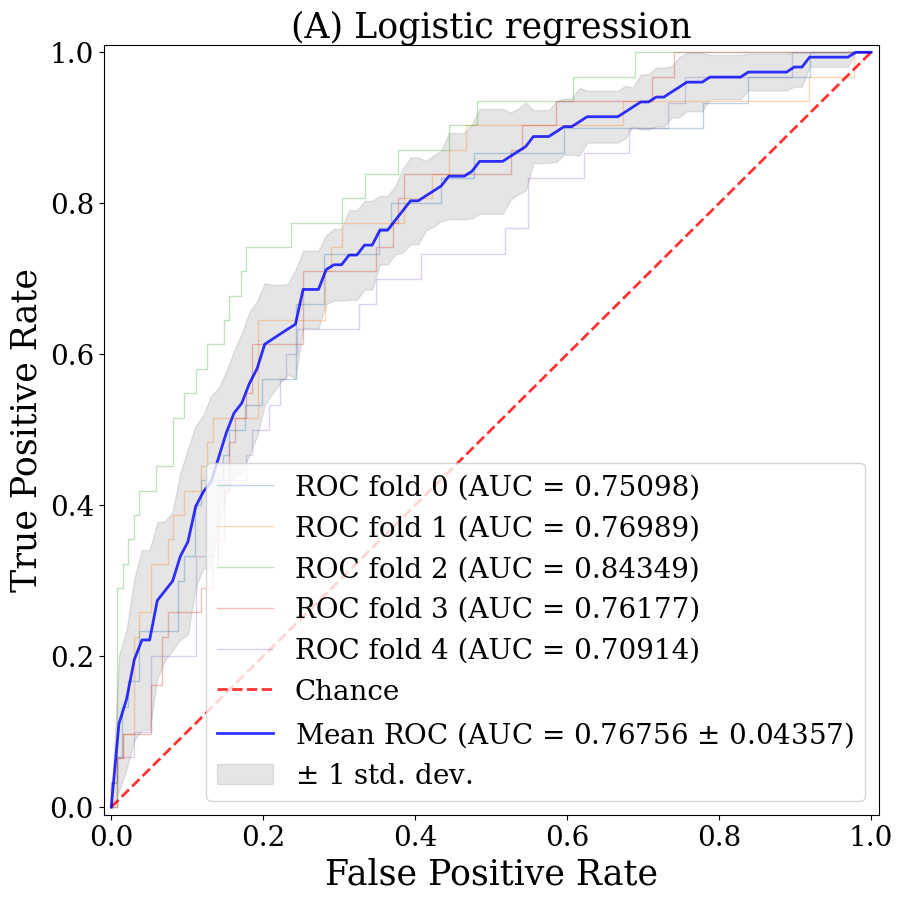

In [117]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
pre =  make_pipeline(StandardScaler(),PowerTransformer())
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):

    #sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=SEED)
    #X_res2,y_res2 = sm.fit_resample(X_res1.iloc[train], y_res1.iloc[train])


    #X_res3 = pre.fit_transform(X_res2)
    #X_te = pre.transform(X_res1.iloc[test])
    #probas_ = classifier.fit(X_res3, y_res2).predict_proba(X_te)

    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    probas_ = classifier.fit(X_res3, y_res2).predict_proba(X_te)



    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(A) Logistic regression',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(A) LR.png',format="png", dpi=600)
plt.show()

In [118]:
from sklearn import metrics
import matplotlib.pyplot as plt
from statistics import mean

SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

(0.7447311827956989,
 0.6641176470588235,
 0.5644798308783335,
 0.3371821116736371,
 0.46324596041209587,
 0.6790361445783133,
 0.9197707073483599,
 0.7044244149272613)

# Validation

In [119]:
imp_mean = IterativeImputer(random_state=SEED)
X_val2= imp_mean.fit_transform(X_val)
X_val2 = pd.DataFrame(X_val2)
X_val2.index = X_val2.index
X_val2.columns = X_.columns

In [120]:
clf = classifier

In [121]:
X_resF,y_resF = rus1.fit_resample(X_res1, y_res1)
clf.fit(X_resF, y_resF)

y_pred_F = clf.predict(X_val2)
y_true_F = y_val

df_report_F= pd.DataFrame(classification_report(y_true_F, y_pred_F, output_dict=True)).T
cm_F = confusion_matrix(y_true_F, y_pred_F)

df_report_F= pd.DataFrame(classification_report(y_true_F, y_pred_F, output_dict=True)).T
df_report_F.set_axis(["Responder","Non-responder", "accuracy", "macro avg","weighted avg"], axis="index", inplace=True)
df_report_F

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


,precision,recall,f1-score,support
Responder,0.888889,0.618785,0.729642,181.000000
Non-responder,0.295918,0.674419,0.411348,43.000000
accuracy,0.629464,0.629464,0.629464,0.629464
macro avg,0.592404,0.646602,0.570495,224.000000
weighted avg,0.775060,0.629464,0.668541,224.000000


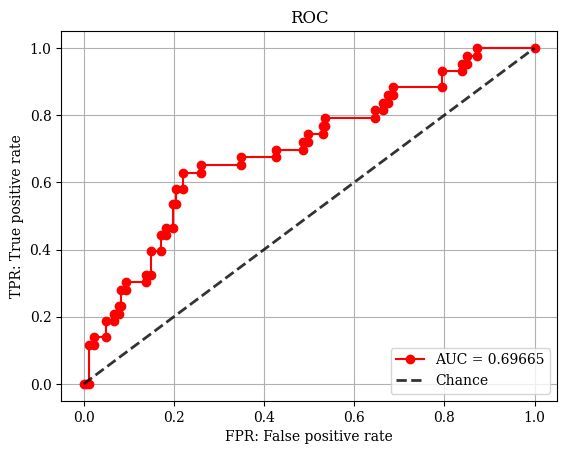

In [122]:
y_pred_prob = clf.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true_F, y_pred_prob)
b = roc_auc_score(y_true_F, y_pred_prob)
plt.plot(fpr, tpr, marker='o',label='AUC = %.5f'%b,color='r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Chance', alpha=.8)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend(loc="lower right")
plt.title('ROC')
plt.grid()
#plt.savefig('final_ROC_LR.png',format="png", dpi=600)
plt.show()

# SVM

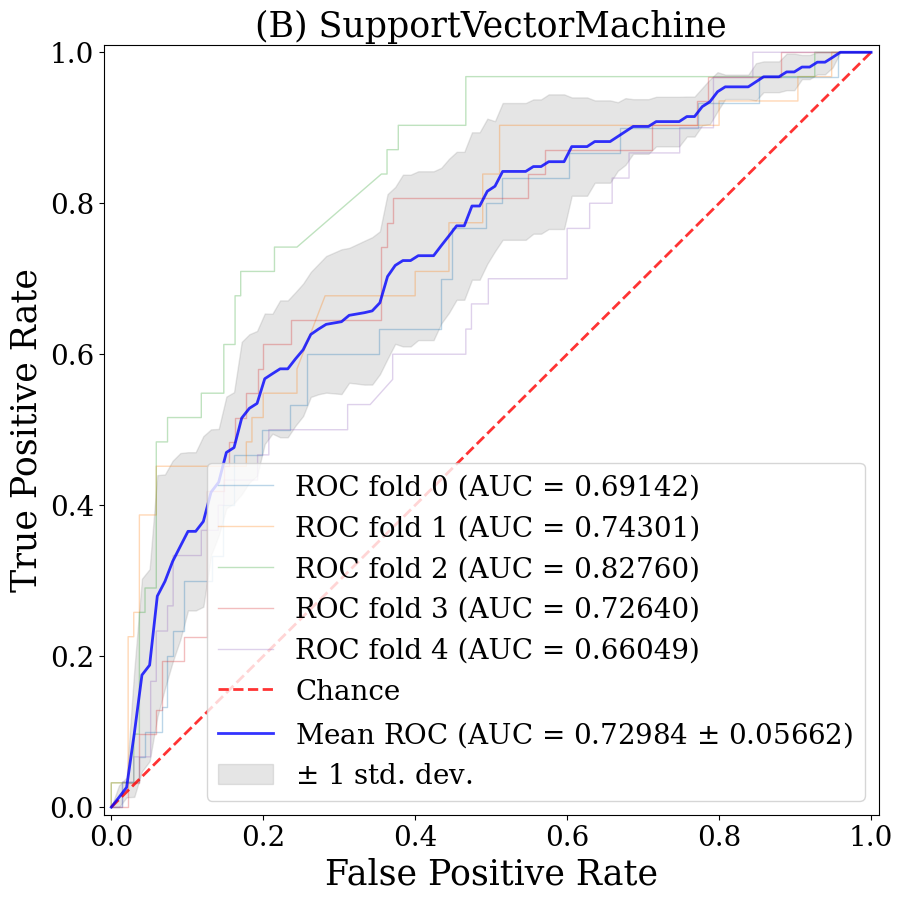

In [123]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)

pre =  make_pipeline(StandardScaler(),PowerTransformer())
classifier = SVC(probability=True,C=0.1, kernel='rbf',random_state=SEED)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    probas_ = classifier.fit(X_res3, y_res2).predict_proba(X_te)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(B) SupportVectorMachine',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(B) SVM.png',format="png", dpi=600)
plt.show()

In [124]:
SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

(0.672258064516129,
 0.6582026143790849,
 0.521051566093566,
 0.30951648059542797,
 0.4231093875076109,
 0.6609419496166484,
 0.8991080593861593,
 0.665230339447607)

# RF

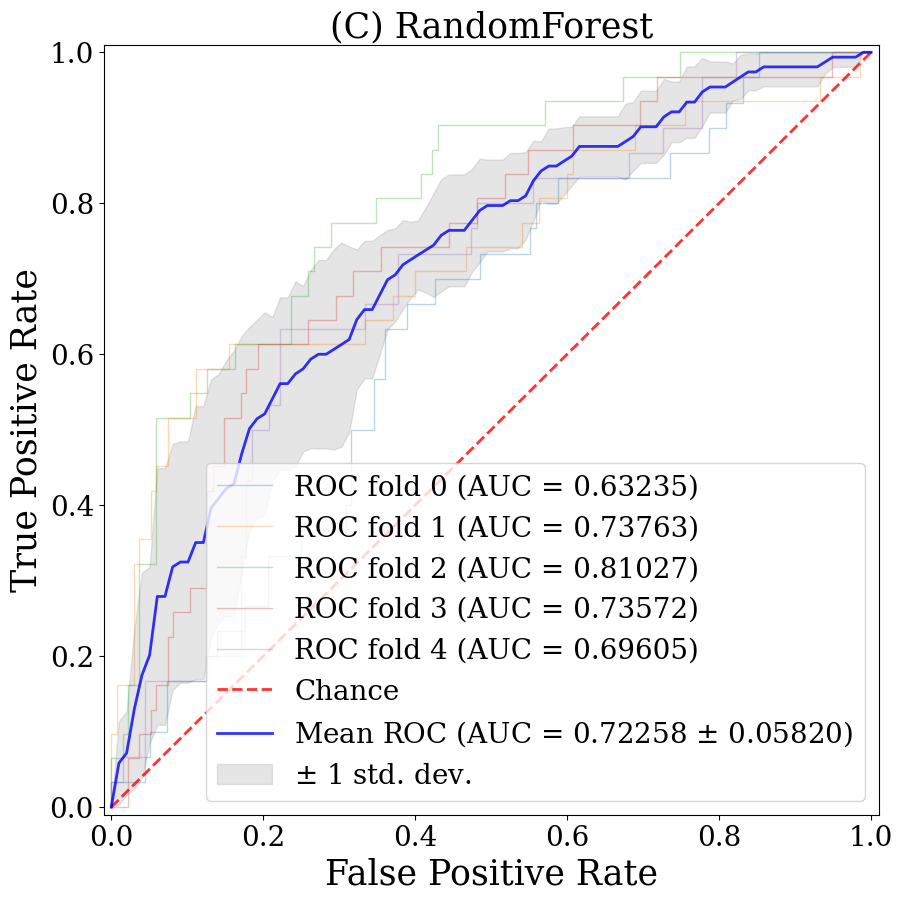

In [135]:

from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier =RandomForestClassifier(random_state=SEED,max_depth=3,min_samples_leaf=3,n_estimators=110,min_samples_split=3,max_leaf_nodes=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2, y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    probas_ = classifier.fit(X_res2, y_res2).predict_proba(X_res1.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(C) RandomForest',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(C) RF.png',format="png", dpi=600)
plt.show()

In [136]:
SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

(0.626021505376344,
 0.6745424836601307,
 0.49830955931977305,
 0.3018425931828807,
 0.40696803273241317,
 0.6658561518802483,
 0.8897203615939964,
 0.6502819945182374)

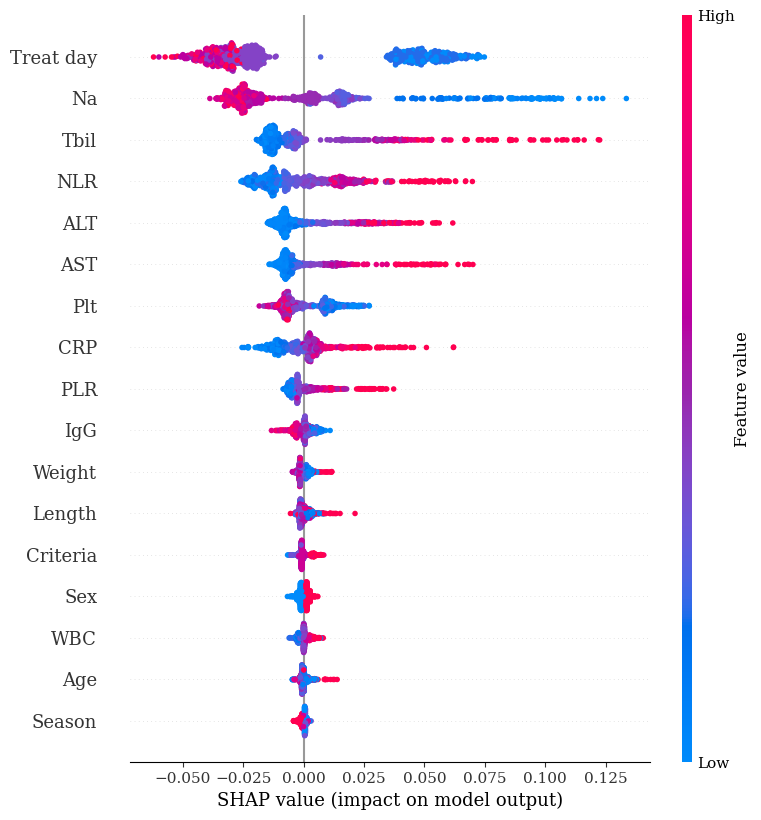

In [137]:
!pip install shap
from shap import TreeExplainer
from shap import summary_plot

classifier.fit(X_res1, y_res1)
explainer = TreeExplainer(classifier)
shap_values = np.array(explainer.shap_values(X_res1))
shap_values.shape
summary_plot(shap_values[1], X_res1,show=False)
plt.savefig('SHAP_RF.png')

# XGBC

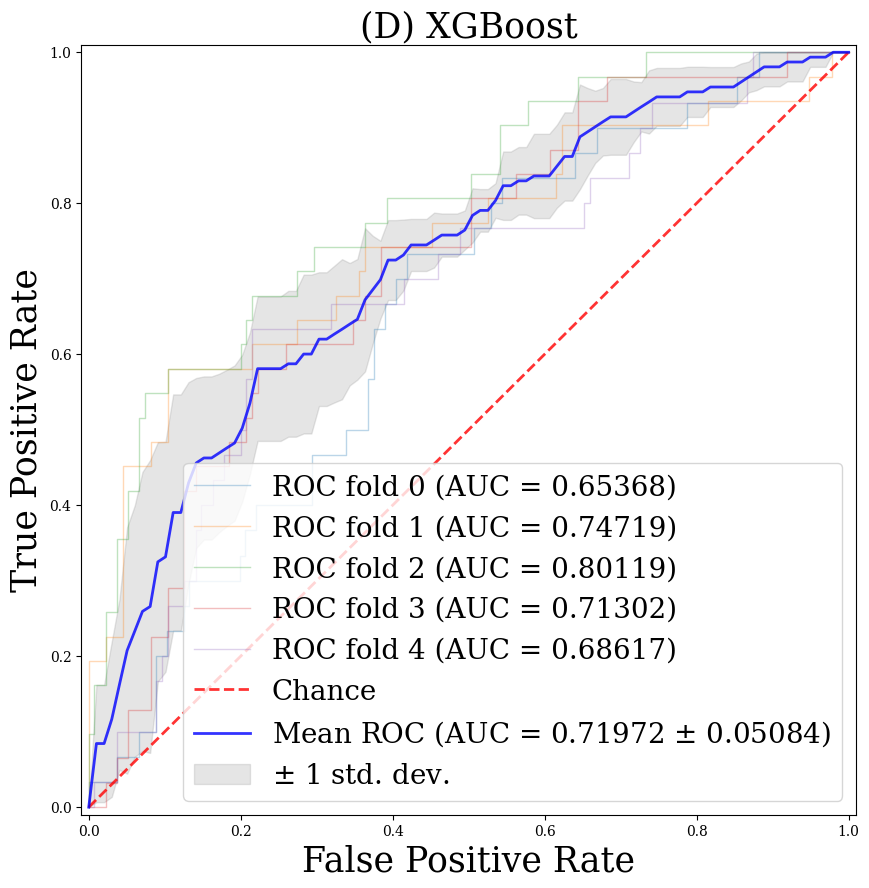

In [128]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier =XGBClassifier(random_state=SEED,n_estimators=90,
                          colsample_bytree=0.5,learning_rate=0.01,max_depth=3,min_child_weight=5,subsample=0.5,reg_lambda=0.1,reg_alpha=0.003,gamma=0.01)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2, y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    probas_ = classifier.fit(X_res2, y_res2).predict_proba(X_res1.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(D) XGBoost',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(D) XGB.png',format="png", dpi=600)
plt.show()

In [129]:
SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

(0.6131182795698925,
 0.6819172113289761,
 0.492875734836481,
 0.3014685314685315,
 0.40376281675187886,
 0.6694998174516247,
 0.8876270875207821,
 0.6475177454494343)

[11:53:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


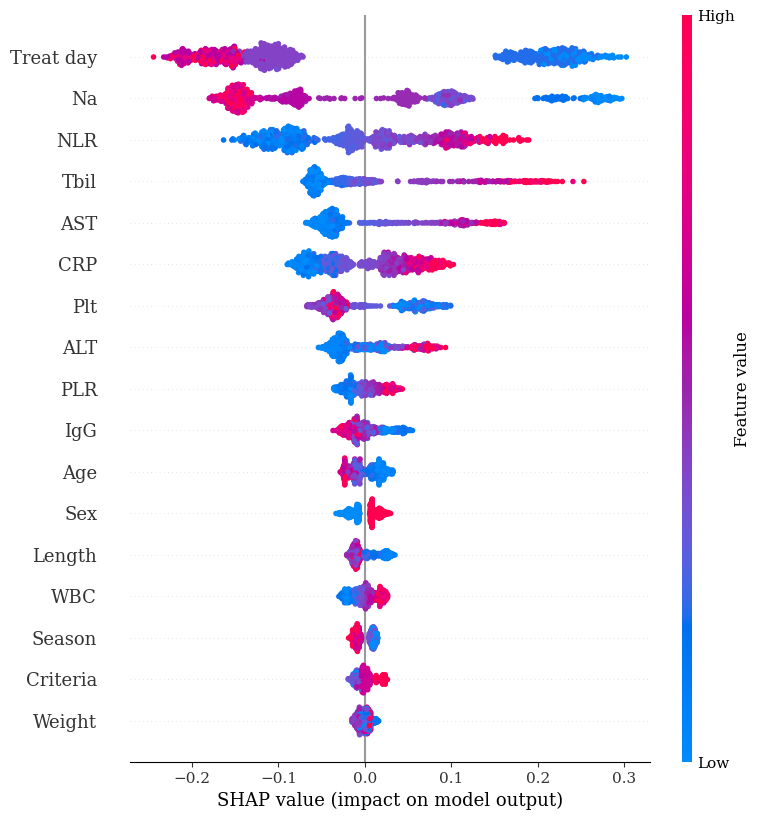

In [130]:
classifier.fit(X_res1, y_res1)
explainer = TreeExplainer(classifier)
shap_values = np.array(explainer.shap_values(X_res1))
shap_values.shape
summary_plot(shap_values, X_res1,show=False)
plt.savefig('SHAP_XGB.png')

# LGBM

[LightGBM] [Info] Number of positive: 123, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 246, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 122, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 122, number of negative: 122
[Ligh

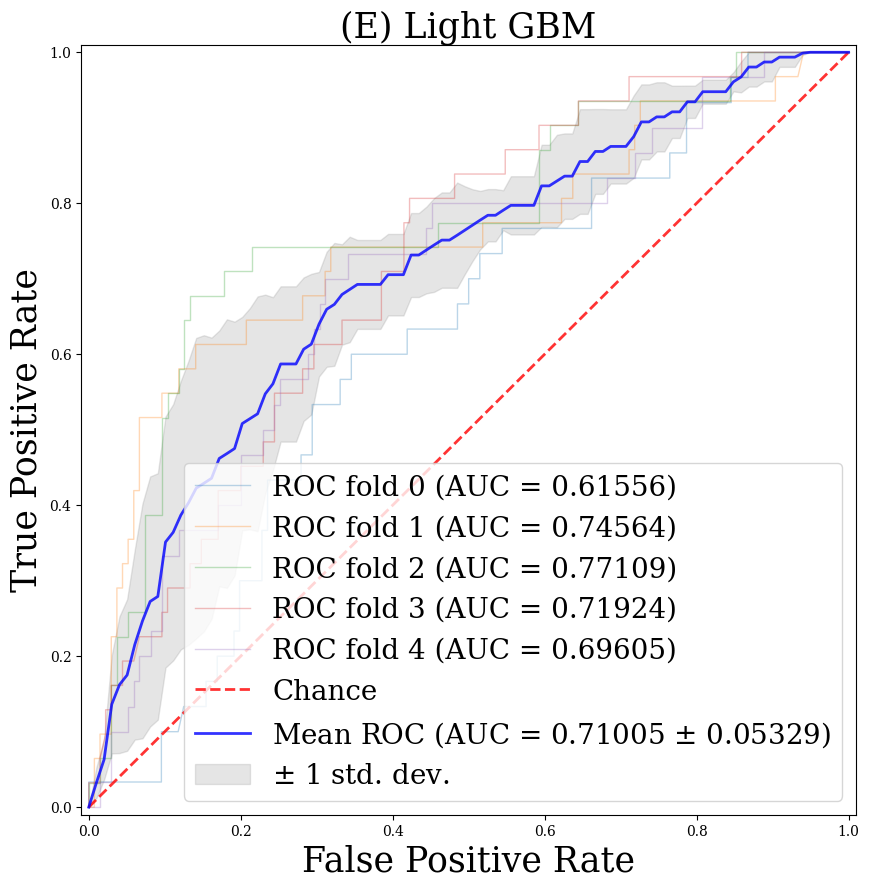

In [138]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)

pre =  make_pipeline(StandardScaler(),PowerTransformer())
classifier = LGBMClassifier(random_state=SEED,boosting_type='gbdt' , n_estimators=20,reg_alpha=0.68062849104778112, reg_lambda=0.5183149895602818, num_leaves=3, colsample_bytree=0.4545491606995836,
                            subsample=0.3285286325866263, subsample_freq=2, min_child_samples=3)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    probas_ = classifier.fit(X_res3, y_res2).predict_proba(X_te)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(E) Light GBM',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(E) LGBM.png',format="png", dpi=600)
plt.show()

In [139]:
SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

[LightGBM] [Info] Number of positive: 123, number of negative: 123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 246, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 122, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 122, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

(0.6591397849462366,
 0.6789760348583878,
 0.5191798689713183,
 0.31648902930162087,
 0.4274016019080638,
 0.6755312157721797,
 0.898831210319081,
 0.6690579099023122)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 153, number of negative: 676
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 829, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184560 -> initscore=-1.485755
[LightGBM] [Info] Start training from score -1.485755


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


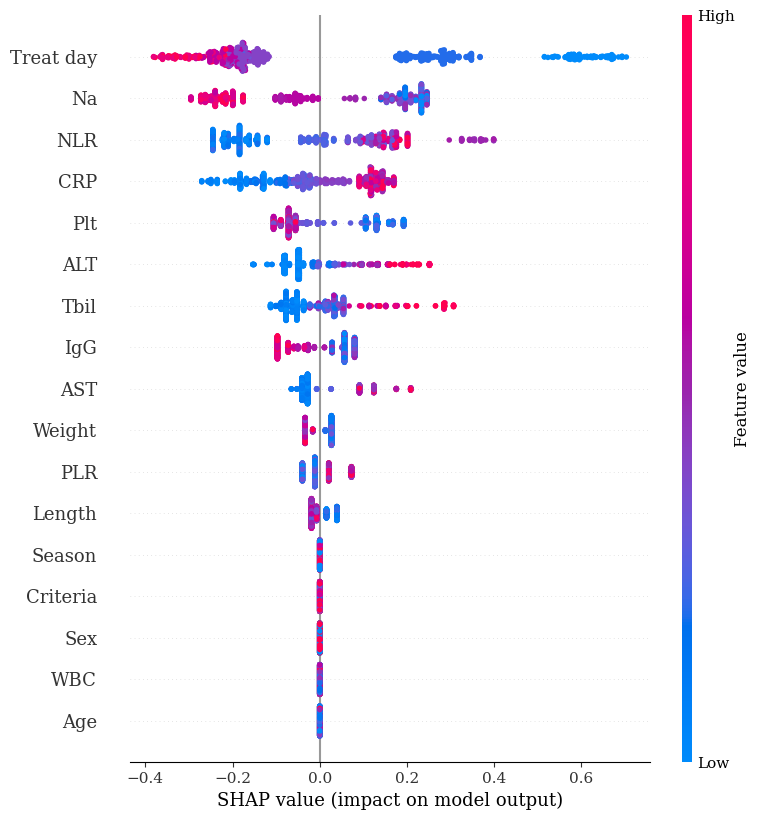

In [140]:
classifier.fit(X_res1, y_res1)
explainer = TreeExplainer(classifier)
shap_values = np.array(explainer.shap_values(X_res1))
shap_values.shape
summary_plot(shap_values[1], X_res1,show=False)
plt.savefig('SHAP_LGB.png')

# Stacking (LR+SVM+RF)

In [141]:
CLF1 = make_pipeline(StandardScaler(), PowerTransformer(),LogisticRegression(C=0.1, penalty='l1', solver='liblinear',random_state=SEED))
CLF2 = make_pipeline(StandardScaler(),SVC(probability=True,C=1, kernel='rbf',random_state=SEED))
CLF3 = RandomForestClassifier(random_state=SEED,max_depth=3,min_samples_leaf=3,n_estimators=38,min_samples_split=8,max_leaf_nodes=10)
CLF4 =  make_pipeline(StandardScaler(), PowerTransformer(),ExtraTreesClassifier(random_state=SEED,max_depth=5, min_samples_leaf=2))
CLF5 = GradientBoostingClassifier(random_state=SEED,learning_rate=0.02,n_estimators=90,criterion='squared_error')
CLF6 =   LGBMClassifier(random_state=SEED,boosting_type='gbdt',
                            n_estimators=50,reg_alpha=0.48062849104778112, reg_lambda=0.3183149895602818, num_leaves=3, colsample_bytree=0.4545491606995836,
                            subsample=0.6285286325866263, subsample_freq=3, min_child_samples=5)
CLF7 = make_pipeline(StandardScaler(), PowerTransformer(),GaussianNB())

CLF9 = make_pipeline(StandardScaler(), PowerTransformer(),MLPClassifier(random_state=SEED))
CLF10 =  make_pipeline(StandardScaler(), PowerTransformer(),ExtraTreesClassifier(random_state=SEED,max_depth=5, min_samples_leaf=2))
CLF11 =  XGBClassifier(random_state=SEED)

clf1 = LogisticRegression(C=0.07, penalty='l2', solver='lbfgs',random_state=SEED)
clf2 = SVC(probability=True,C=1, kernel='rbf',random_state=SEED)
clf3 = RandomForestClassifier(random_state=SEED,max_depth=4,min_samples_leaf=4,n_estimators=38)
clf4 = ExtraTreesClassifier(random_state=SEED,max_depth=5, min_samples_leaf=2)

In [142]:
from sklearn.ensemble import StackingClassifier
estimators = [
       ('lr', CLF1), ('svm', CLF2),('rf',CLF3)
        ]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=SEED)
)

CLASSIFIER = CLF1

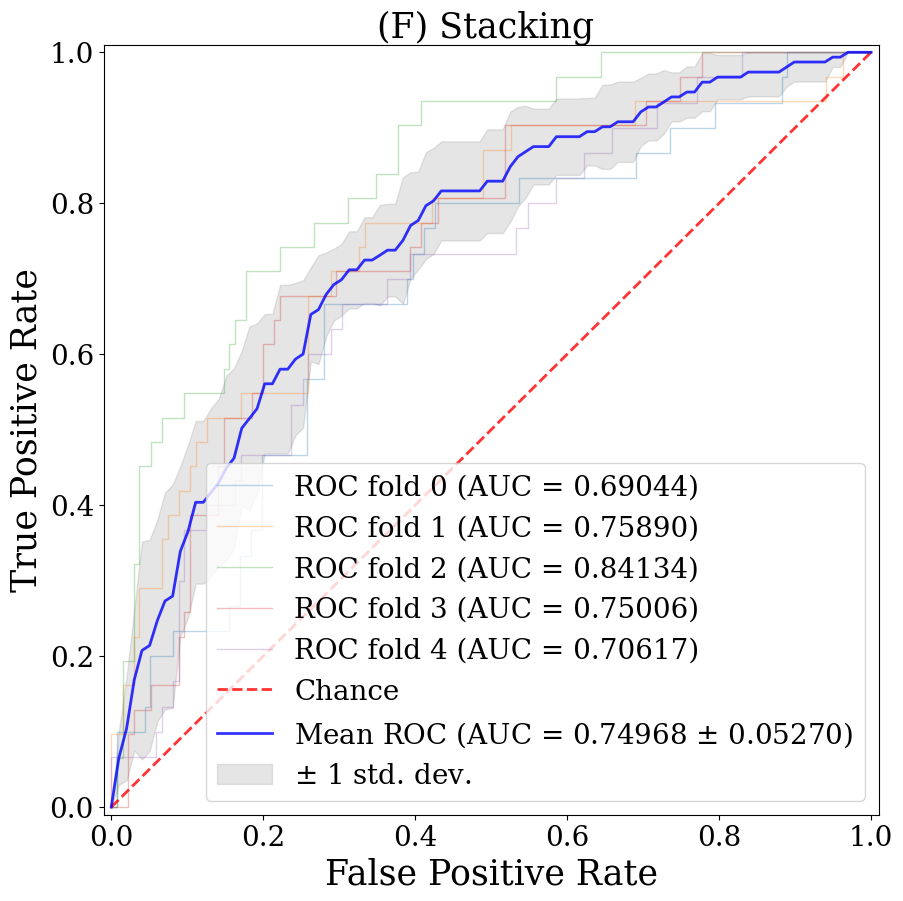

In [143]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier = clf
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2, y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])

    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    probas_ = classifier.fit(X_res3, y_res2).predict_proba(X_te)


    #probas_ = classifier.fit(X_res2, y_res2).predict_proba(X_res1.iloc[test])

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(F) Stacking ',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(F) Stacking.png',format="png", dpi=600)
plt.show()

In [144]:
SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1, y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

(0.718494623655914,
 0.6730501089324619,
 0.5523286692874128,
 0.334289768588134,
 0.4557470479830728,
 0.6814749908725812,
 0.9133122433122434,
 0.6957723662941879)

# selected four features(Treat day, Tbil, NLR, Na)

In [145]:
feat4 = ['Treat day','NLR', 'Tbil','Na']

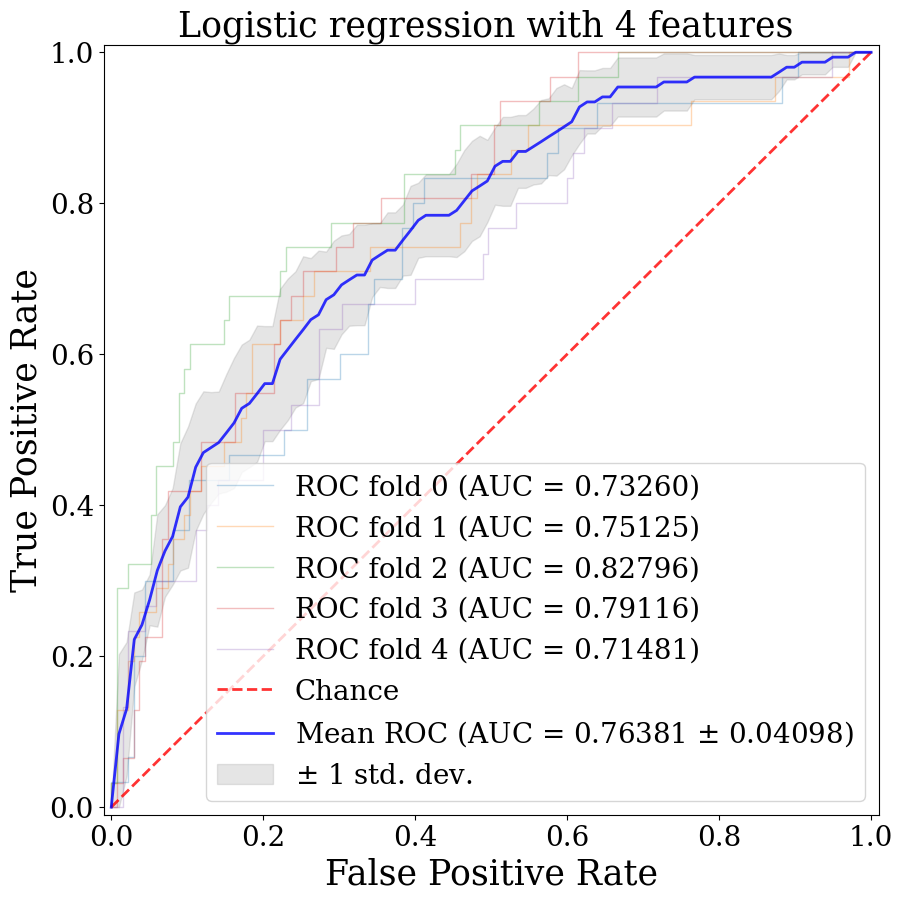

In [146]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier = CLF1
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1.loc[:,feat4], y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2, y_res2 = rus1.fit_resample(X_res1.loc[:,feat4].iloc[train], y_res1.iloc[train])
    probas_ = classifier.fit(X_res2, y_res2).predict_proba(X_res1.loc[:,feat4].iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('Logistic regression with 4 features ',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('Logistic regression with 4 featrues.png',format="png", dpi=600)
plt.show()

In [147]:
SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []
AUC =[]

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
for train, test in cv.split(X_res1.loc[:,feat4], y_res1):
    positive_count_train = y_res1.iloc[train].value_counts()[1]
    strategy = {0:positive_count_train, 1:positive_count_train}
    rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    X_res2,y_res2 = rus1.fit_resample(X_res1.loc[:,feat4].iloc[train], y_res1.iloc[train])
    X_res3 = pre.fit_transform(X_res2)
    X_te = pre.transform(X_res1.loc[:,feat4].iloc[test])
    y_pred_F = classifier.fit(X_res3, y_res2).predict(X_te)
    y_true_F = y_res1.iloc[test]

    SEN.append(recall_score(y_true_F, y_pred_F))
    SPC.append(specificity_score(y_true_F, y_pred_F))
    precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_F)
    AUPRC.append(metrics.auc(recall, precision))
    PRE.append(precision_score(y_true_F, y_pred_F))
    F1.append(f1_score(y_true_F, y_pred_F))
    ACC.append(accuracy_score(y_true_F, y_pred_F))
    NPV.append(negative_predictive_value(y_true_F, y_pred_F))
    AUC.append(roc_auc_score(y_true_F, y_pred_F))

mean(SEN),mean(SPC),mean(AUPRC),mean(PRE),mean(F1),mean(ACC),mean(NPV),mean(AUC)

(0.698494623655914,
 0.6804575163398693,
 0.5436959522227244,
 0.333402574692419,
 0.4505748663101604,
 0.6838992332968237,
 0.9089432704829479,
 0.6894760699978917)

# Validation

In [148]:
imp_mean = IterativeImputer(random_state=SEED)
X_val2= imp_mean.fit_transform(X_val)
X_val2 = pd.DataFrame(X_val2)
X_val2.index = X_val2.index
X_val2.columns = X_.columns

In [149]:
clf = CLF1

X_resF,y_resF = rus1.fit_resample(X_res1.loc[:,feat4], y_res1)
clf.fit(X_resF.loc[:,feat4], y_resF)

y_pred_F = clf.predict(X_val2.loc[:,feat4])
y_true_F = y_val

df_report_F= pd.DataFrame(classification_report(y_true_F, y_pred_F, output_dict=True)).T
cm_F = confusion_matrix(y_true_F, y_pred_F)

df_report_F= pd.DataFrame(classification_report(y_true_F, y_pred_F, output_dict=True)).T
df_report_F.set_axis(["Responder","Non-responder", "accuracy", "macro avg","weighted avg"], axis="index", inplace=True)
df_report_F

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


,precision,recall,f1-score,support
Responder,0.881119,0.696133,0.777778,181.000000
Non-responder,0.320988,0.604651,0.419355,43.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.601053,0.650392,0.598566,224.000000
weighted avg,0.773594,0.678571,0.708973,224.000000


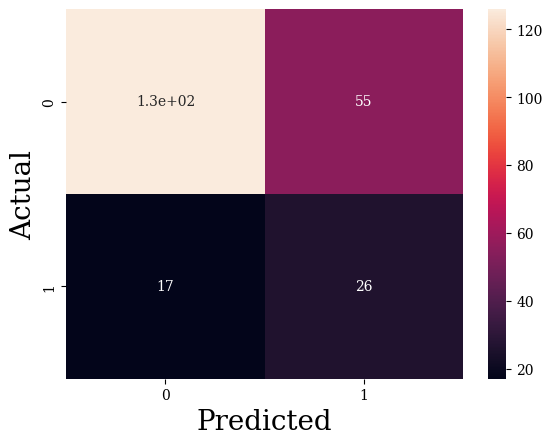

In [150]:
p=sns.heatmap(cm_F, annot=True)
p.set_xlabel("Predicted", fontsize = 20)
p.set_ylabel("Actual", fontsize = 20)
plt.savefig('confusion_matrix.png', dpi = 600)

In [151]:
print('confusion matrix = \n', confusion_matrix(y_true_F, y_pred_F))
print(f'Accuracy : {accuracy_score(y_true_F, y_pred_F)}')
print(f'Precision : {precision_score(y_true_F, y_pred_F)}')
print(f'Recall : {recall_score(y_true_F, y_pred_F)}')
print(f'F1 score : {f1_score(y_true_F, y_pred_F)}')
print(f'AUC: {roc_auc_score(y_true_F, y_pred_F)}')
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
print(f'specificity :{specificity_score(y_true_F, y_pred_F)}')
print(f'NPV :{negative_predictive_value(y_true_F, y_pred_F)}')


confusion matrix = 
 [[126  55]
 [ 17  26]]
Accuracy : 0.6785714285714286
Precision : 0.32098765432098764
Recall : 0.6046511627906976
F1 score : 0.41935483870967744
AUC: 0.6503918797378903
specificity :0.6961325966850829
NPV :0.8811188811188811


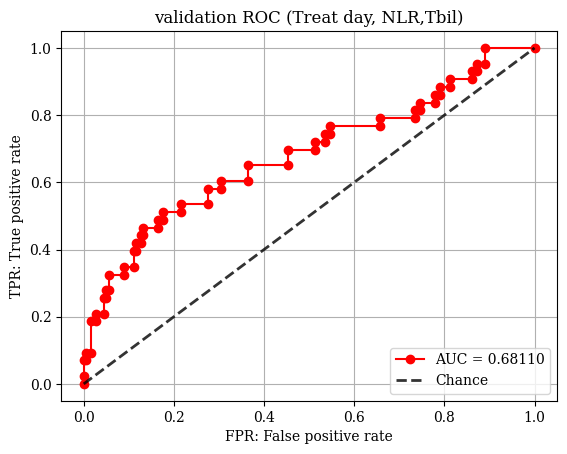

In [152]:
y_pred_prob = clf.predict_proba(X_val2.loc[:,feat4])[:, 1]
fpr, tpr, thresholds = roc_curve(y_true_F, y_pred_prob)
b = roc_auc_score(y_true_F, y_pred_prob)
plt.plot(fpr, tpr, marker='o',label='AUC = %.5f'%b,color='r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Chance', alpha=.8)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend(loc="lower right")
plt.title('validation ROC (Treat day, NLR,Tbil)')
plt.grid()
plt.savefig('final_ROC_TNT.png',format="png", dpi=600)
plt.show()

In [153]:
from sklearn import metrics
import matplotlib.pyplot as plt
precision, recall, thresholds = metrics.precision_recall_curve(y_true_F, y_pred_prob)

a = metrics.auc(recall, precision)
a

0.43285804388600224